# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins

In [30]:
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_line, labs, scale_color_manual
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay

In [8]:
penguins = load_penguins()
penguins = penguins.dropna()

In [35]:
penguins_indiv = penguins
penguins_indiv["gentoo"] = (penguins_indiv["species"] == "Gentoo").astype(int)
penguins_indiv["adelie"] = (penguins_indiv["species"] == "Adelie").astype(int)
penguins_indiv["chinstrap"] = (penguins_indiv["species"] == "Chinstrap").astype(int)
penguins_indiv = penguins_indiv.drop("species", axis=1)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [33]:
# Predefine unchanging methods:

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown="ignore"),
    make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

In [101]:
# Define function for automating:

def perform_fit(model, X, y, binary=True):

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

  my_pipeline = Pipeline(
    [("preprocessing", ct),
    ("model", model)]
  ).set_output(transform = "pandas")

  fitted = my_pipeline.fit(X_train, y_train)
  preds = fitted.predict(X_test)

  print("Confusion Matrix: \n" + str(confusion_matrix(y_test, preds)) + "\n")
  print("Accuracy Score: " + str(accuracy_score(y_test, preds)) + "\n")

  if binary:
    print("Precision Score: " + str(precision_score(y_test, preds)) + "\n")
    print("Recall Score: " + str(recall_score(y_test, preds)) + "\n")
    print("F1 Score: " + str(f1_score(y_test, preds)) + "\n")

    RocCurveDisplay.from_predictions(y_test, preds)

In [103]:
# KNN on all 3 classes, using K=10

X = penguins.drop("species", axis=1)
y = penguins["species"]
perform_fit(KNeighborsClassifier(n_neighbors=10), X, y, binary=False)

Confusion Matrix: 
[[35  0  0]
 [ 0 17  0]
 [ 0  0 32]]

Accuracy Score: 1.0



Confusion Matrix: 
[[52  0]
 [ 0 32]]

Accuracy Score: 1.0

Precision Score: 1.0

Recall Score: 1.0

F1 Score: 1.0



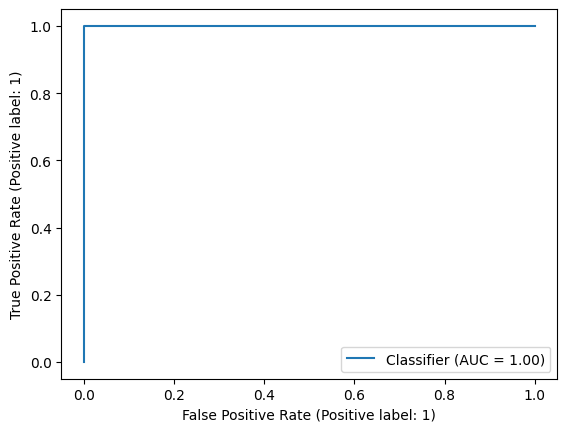

In [104]:
# KNN on Gentoo, using K=10
X = penguins_indiv.drop(["adelie", "chinstrap"], axis=1)
y = penguins_indiv["gentoo"]
perform_fit(KNeighborsClassifier(n_neighbors=10), X, y)

Confusion Matrix: 
[[49  0]
 [ 0 35]]

Accuracy Score: 1.0

Precision Score: 1.0

Recall Score: 1.0

F1 Score: 1.0



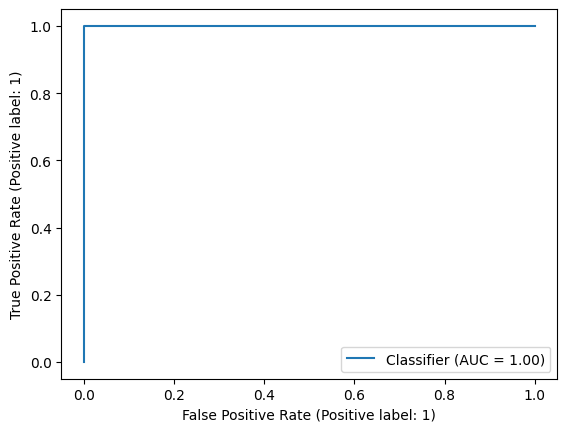

In [105]:
# KNN on Adelie, using K=10
X = penguins_indiv.drop(["gentoo", "chinstrap"], axis=1)
y = penguins_indiv["adelie"]
perform_fit(KNeighborsClassifier(n_neighbors=10), X, y)

Confusion Matrix: 
[[67  0]
 [ 0 17]]

Accuracy Score: 1.0

Precision Score: 1.0

Recall Score: 1.0

F1 Score: 1.0



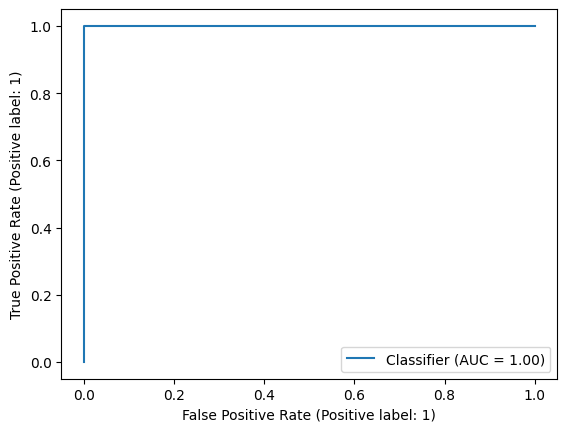

In [106]:
# KNN on Chinstrap, using K=10
X = penguins_indiv.drop(["gentoo", "adelie"], axis=1)
y = penguins_indiv["chinstrap"]
perform_fit(KNeighborsClassifier(n_neighbors=10), X, y)

In [107]:
# KNN on all 3 classes, using K=100
X = penguins.drop("species", axis=1)
y = penguins["species"]
perform_fit(KNeighborsClassifier(n_neighbors=100), X, y, binary=False)

Confusion Matrix: 
[[35  0  0]
 [ 3 14  0]
 [ 0  0 32]]

Accuracy Score: 0.9642857142857143



Confusion Matrix: 
[[52  0]
 [ 0 32]]

Accuracy Score: 1.0

Precision Score: 1.0

Recall Score: 1.0

F1 Score: 1.0



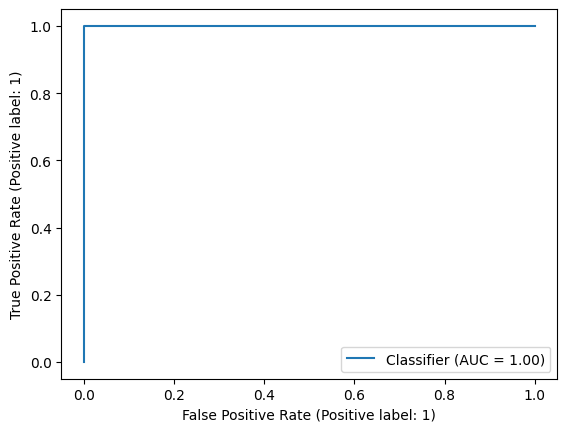

In [108]:
# KNN on Gentoo, using K=100
X = penguins_indiv.drop(["adelie", "chinstrap"], axis=1)
y = penguins_indiv["gentoo"]
perform_fit(KNeighborsClassifier(n_neighbors=100), X, y)

Confusion Matrix: 
[[46  3]
 [ 0 35]]

Accuracy Score: 0.9642857142857143

Precision Score: 0.9210526315789473

Recall Score: 1.0

F1 Score: 0.958904109589041



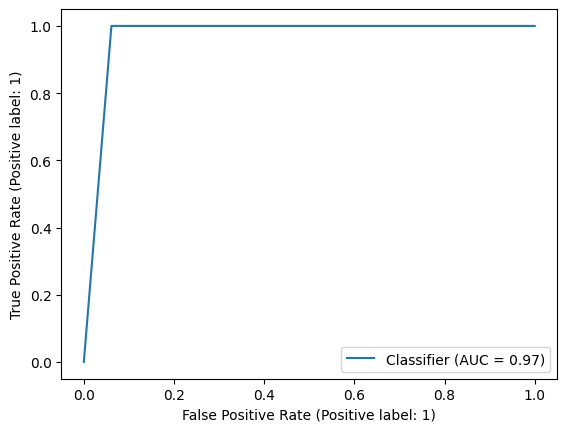

In [109]:
# KNN on Adelie, using K=100
X = penguins_indiv.drop(["gentoo", "chinstrap"], axis=1)
y = penguins_indiv["adelie"]
perform_fit(KNeighborsClassifier(n_neighbors=100), X, y)

Confusion Matrix: 
[[67  0]
 [ 6 11]]

Accuracy Score: 0.9285714285714286

Precision Score: 1.0

Recall Score: 0.6470588235294118

F1 Score: 0.7857142857142858



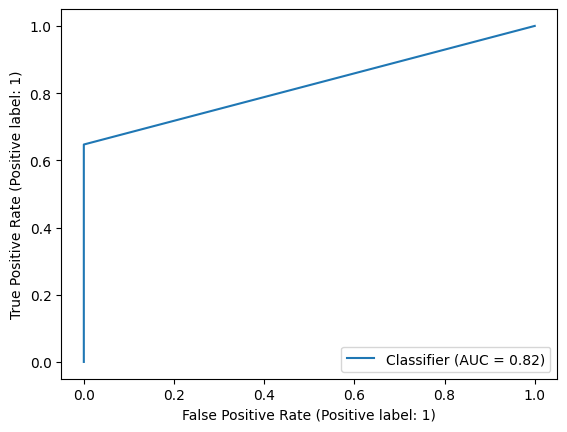

In [110]:
# KNN on Chinstrap, using K=100
X = penguins_indiv.drop(["gentoo", "adelie"], axis=1)
y = penguins_indiv["chinstrap"]
perform_fit(KNeighborsClassifier(n_neighbors=100), X, y)

In [111]:
# Decision Tree on all 3 classes, using max_depth=20 and ccp_alpha=0.01
X = penguins.drop("species", axis=1)
y = penguins["species"]
perform_fit(DecisionTreeClassifier(max_depth=20, ccp_alpha=0.01), X, y, binary=False)

Confusion Matrix: 
[[35  0  0]
 [ 0 17  0]
 [ 0  0 32]]

Accuracy Score: 1.0



Confusion Matrix: 
[[52  0]
 [ 0 32]]

Accuracy Score: 1.0

Precision Score: 1.0

Recall Score: 1.0

F1 Score: 1.0



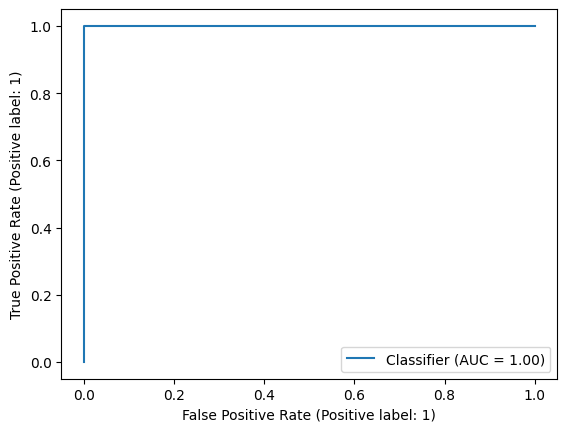

In [112]:
# Decision Tree on Gentoo, using max_depth=20 and ccp_alpha=0.01
X = penguins_indiv.drop(["adelie", "chinstrap"], axis=1)
y = penguins_indiv["gentoo"]
perform_fit(DecisionTreeClassifier(max_depth=20, ccp_alpha=0.01), X, y)

Confusion Matrix: 
[[49  0]
 [ 0 35]]

Accuracy Score: 1.0

Precision Score: 1.0

Recall Score: 1.0

F1 Score: 1.0



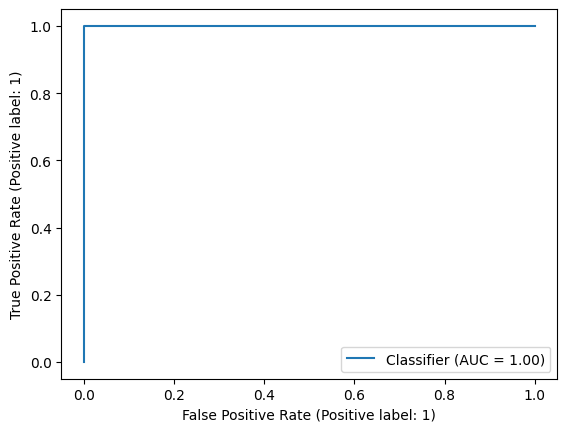

In [114]:
# Decision Tree on Adelie, using max_depth=20 and ccp_alpha=0.01
X = penguins_indiv.drop(["gentoo", "chinstrap"], axis=1)
y = penguins_indiv["adelie"]
perform_fit(DecisionTreeClassifier(max_depth=20, ccp_alpha=0.01), X, y)

Confusion Matrix: 
[[67  0]
 [ 0 17]]

Accuracy Score: 1.0

Precision Score: 1.0

Recall Score: 1.0

F1 Score: 1.0



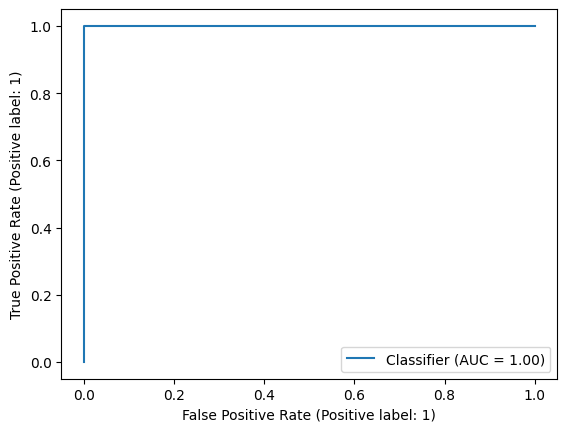

In [115]:
# Decision Tree on Chinstrap, using max_depth=20 and ccp_alpha=0.01
X = penguins_indiv.drop(["gentoo", "adelie"], axis=1)
y = penguins_indiv["chinstrap"]
perform_fit(DecisionTreeClassifier(max_depth=20, ccp_alpha=0.01), X, y)

In [132]:
# Decision Tree on all 3 classes, using max_depth=5, min_samples_leaf=69
# and ccp_alpha=0
X = penguins.drop("species", axis=1)
y = penguins["species"]
perform_fit(DecisionTreeClassifier(max_depth=2, min_samples_leaf=69), X, y, binary=False)

Confusion Matrix: 
[[35  0  0]
 [ 0 17  0]
 [ 0  4 28]]

Accuracy Score: 0.9523809523809523



Confusion Matrix: 
[[52  0]
 [ 0 32]]

Accuracy Score: 1.0

Precision Score: 1.0

Recall Score: 1.0

F1 Score: 1.0



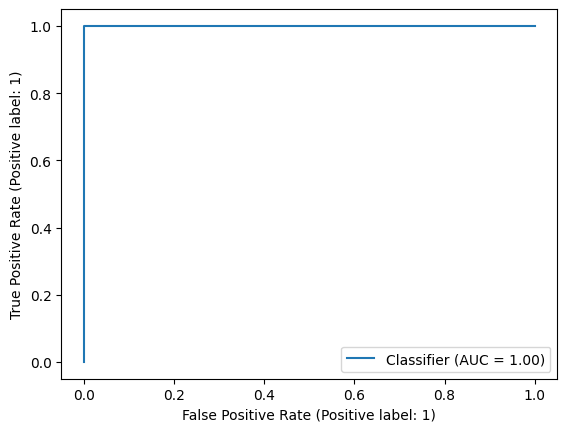

In [135]:
# Decision Tree on Gentoo, using max_depth=5, min_samples_leaf=69
# and ccp_alpha=0
X = penguins_indiv.drop(["adelie", "chinstrap"], axis=1)
y = penguins_indiv["gentoo"]
perform_fit(DecisionTreeClassifier(max_depth=2, min_samples_leaf=69), X, y)

Confusion Matrix: 
[[49  0]
 [ 0 35]]

Accuracy Score: 1.0

Precision Score: 1.0

Recall Score: 1.0

F1 Score: 1.0



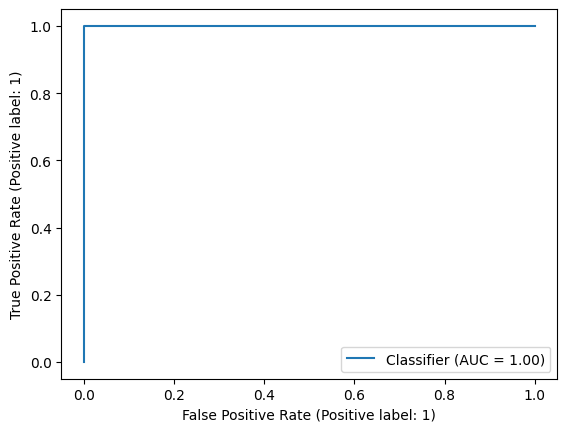

In [134]:
# Decision Tree on Adelie, using max_depth=5, min_samples_leaf=69
# and ccp_alpha=0
X = penguins_indiv.drop(["gentoo", "chinstrap"], axis=1)
y = penguins_indiv["adelie"]
perform_fit(DecisionTreeClassifier(max_depth=2, min_samples_leaf=69), X, y)

Confusion Matrix: 
[[57 10]
 [ 0 17]]

Accuracy Score: 0.8809523809523809

Precision Score: 0.6296296296296297

Recall Score: 1.0

F1 Score: 0.7727272727272727



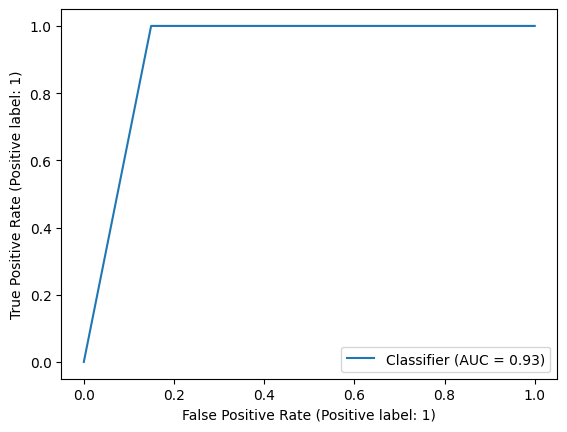

In [133]:
# Decision Tree on Chinstrap, using max_depth=5, min_samples_leaf=69
# and ccp_alpha=0
X = penguins_indiv.drop(["gentoo", "adelie"], axis=1)
y = penguins_indiv["chinstrap"]
perform_fit(DecisionTreeClassifier(max_depth=2, min_samples_leaf=69), X, y)